In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

### Step I: Reading the Data from Dataset

In [2]:
#import the useful libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting the options to display max rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

In [3]:
df = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [6]:
df.shape

(730, 16)

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9959,0.6904,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0003,0.4626,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
#Droping the instant column as it is just having index number of the dataset:
df.drop(['instant'],axis=1,inplace=True)

In [13]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


### Step II : Using EDA to Check Visual of Data 

In [14]:
# Creating a function to find the total null count and null percentage 

def find_NaN(df1):
    NaN_cnt = df1.isna().sum()
    NaN_pct = (df1.isna().sum()/df1.isna().count()*100)
    return pd.concat([NaN_cnt, NaN_pct], axis=1, keys=['Cnt_of_Nulls', 'Null_Percentage'])

In [15]:
find_NaN(df)

,Cnt_of_Nulls,Null_Percentage
dteday,0,0.0000
season,0,0.0000
yr,0,0.0000
mnth,0,0.0000
holiday,0,0.0000
weekday,0,0.0000
workingday,0,0.0000
weathersit,0,0.0000
temp,0,0.0000
atemp,0,0.0000


In [16]:
#Lets first Define Function Univariate.
def univariate(df1,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()

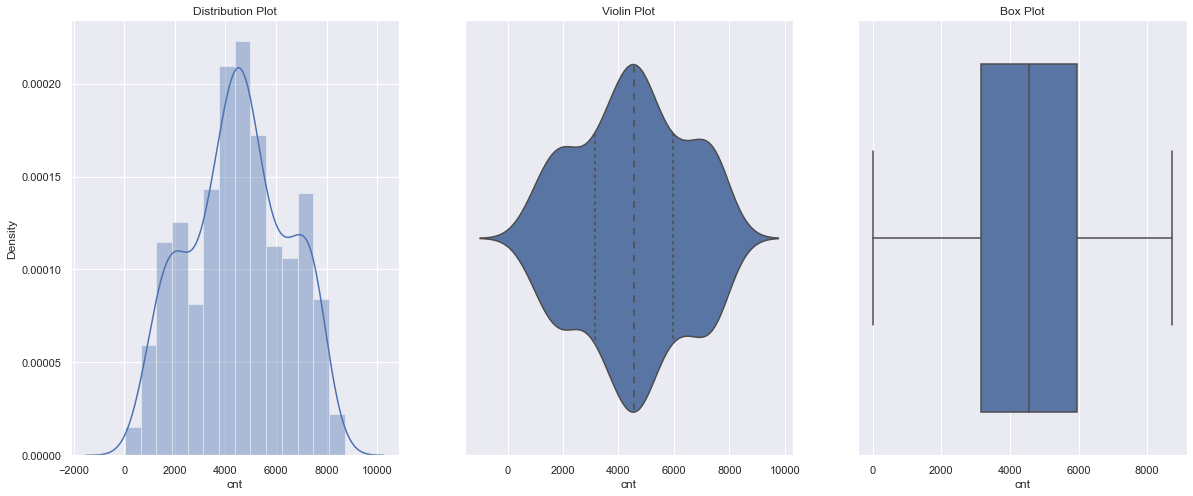

In [18]:
#Lets carry out Univariate analysis on cnt
univariate(df1=df,col='cnt')

#### Inference - Data is normally distributed bet ween 0 to 10000, mean is 4500

In [19]:
# The target variable(cnt) is the sum of the both registered and casual columns, 
# So these columns are not usefull to predict target variable we can drop these columns
# Also to avoid multicollinearity we delete the columns 'casual' and 'registered':
df.drop(['casual','registered'],axis=1,inplace=True)

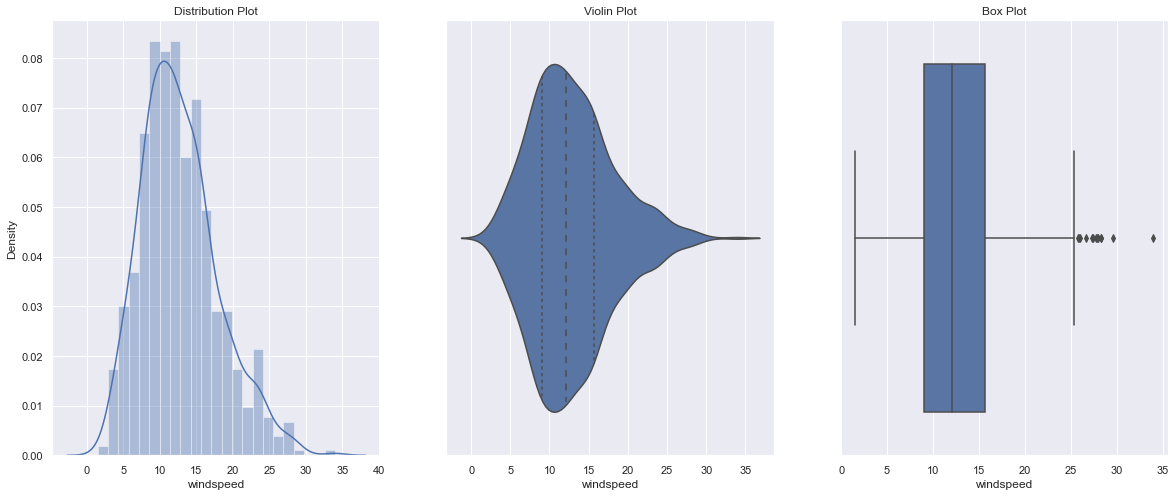

In [21]:
#Lets carry out Univariate analysis on windspeed
univariate(df1=df,col='windspeed')

Inference - windspeed column is normally distributed between 1 to 30 with mean of 12

In [24]:
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.1108,18.1812,80.5833,10.7499,985
1,02-01-2018,1,0,1,0,2,1,2,14.9026,17.6869,69.6087,16.6521,801
2,03-01-2018,1,0,1,0,3,1,1,8.0509,9.4703,43.7273,16.6367,1349
3,04-01-2018,1,0,1,0,4,1,1,8.2000,10.6061,59.0435,10.7398,1562
4,05-01-2018,1,0,1,0,5,1,1,9.3052,11.4635,43.6957,12.5223,1600


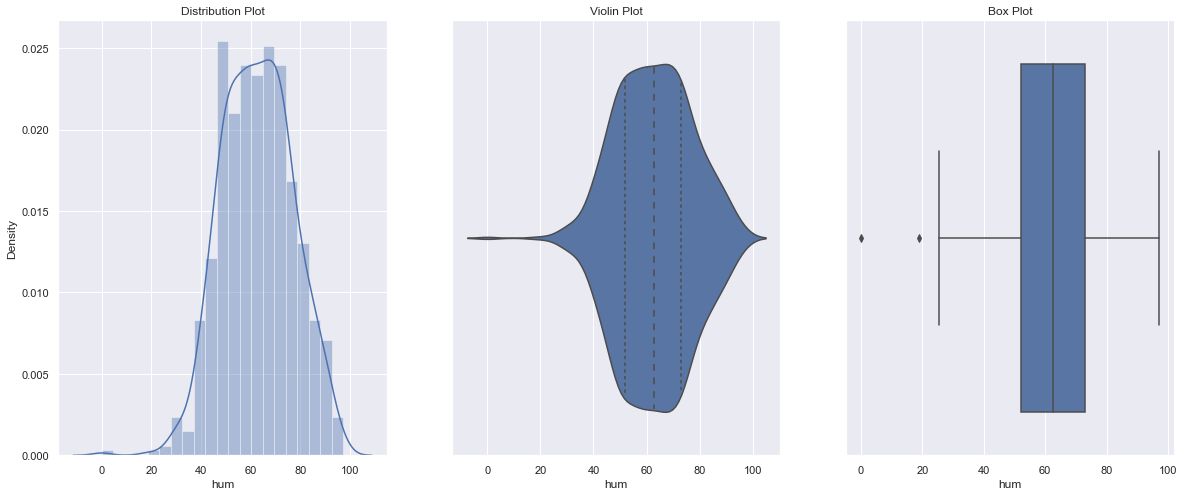

In [25]:
#Lets carry out Univariate analysis on hum
univariate(df1=df,col='hum')

#### Inference - humudity column data is right skewed normal distribution with mean of 62

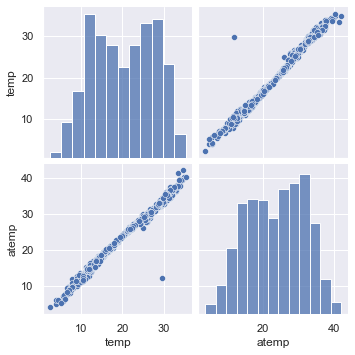

In [26]:
# Analysis on Column: atemp & temp
sns.pairplot(df[['temp','atemp']])
plt.show()

Inference - Predictor columns temp and atemp are very much correlated to each other, so we can drop any one of them, here we are dropping atemp variable.

In [27]:
#Droping the atemp variable:
df.drop(['atemp'],axis=1,inplace=True)

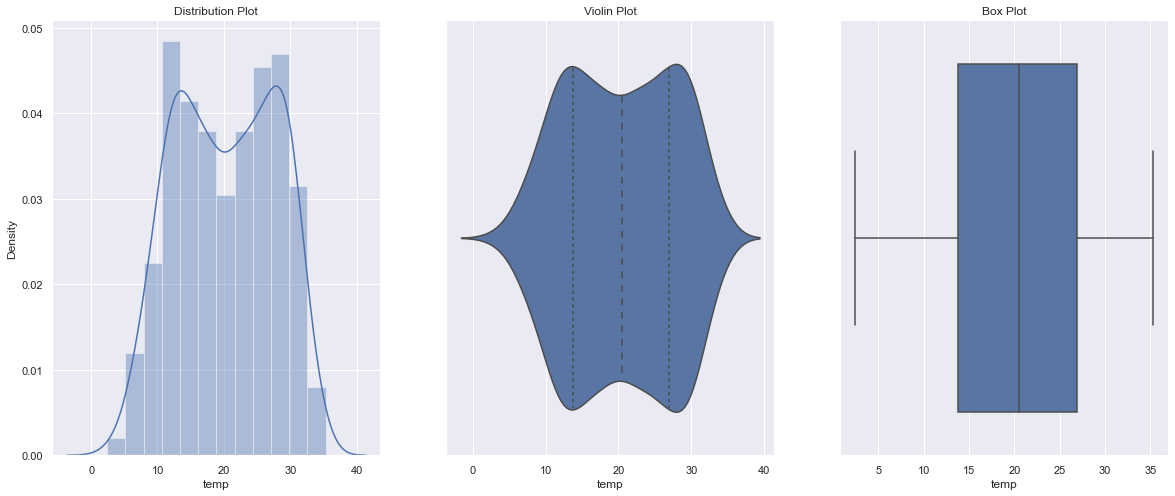

In [28]:
#Lets carry out Univariate analysis on temp
univariate(df1=df,col='temp')

Inference - temp column data is right skewed normal distribution with mean of 20

### Correlation Matrix and Heat Map

In [29]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.1108,80.5833,10.7499,985
1,02-01-2018,1,0,1,0,2,1,2,14.9026,69.6087,16.6521,801
2,03-01-2018,1,0,1,0,3,1,1,8.0509,43.7273,16.6367,1349
3,04-01-2018,1,0,1,0,4,1,1,8.2000,59.0435,10.7398,1562
4,05-01-2018,1,0,1,0,5,1,1,9.3052,43.6957,12.5223,1600


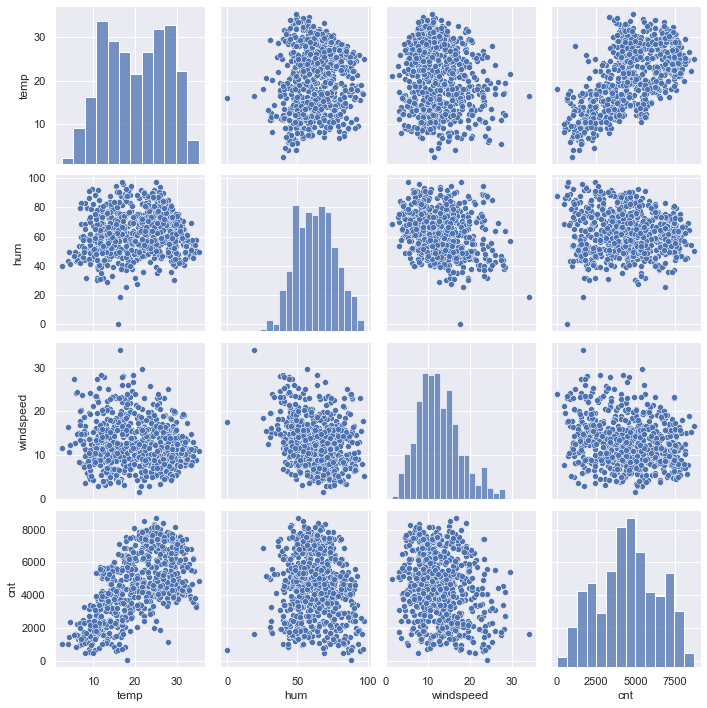

In [30]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

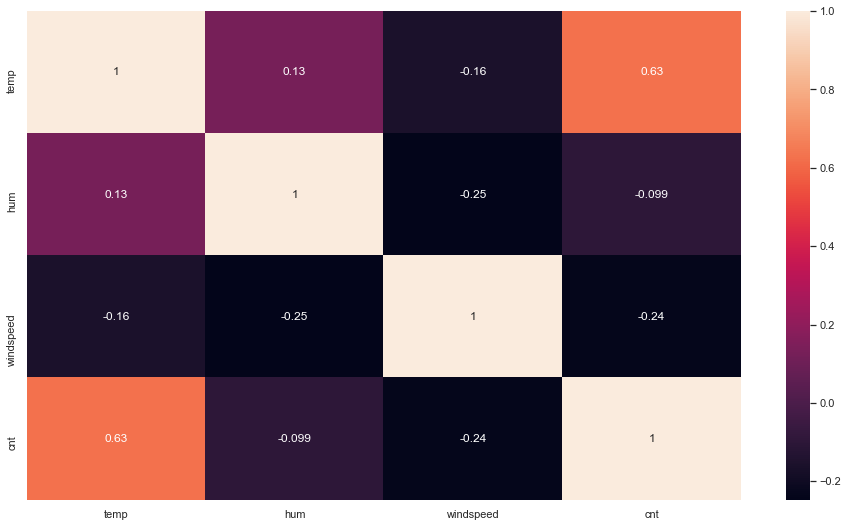

In [35]:
corr_df= df[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

###  Visualising Categorical Variables:

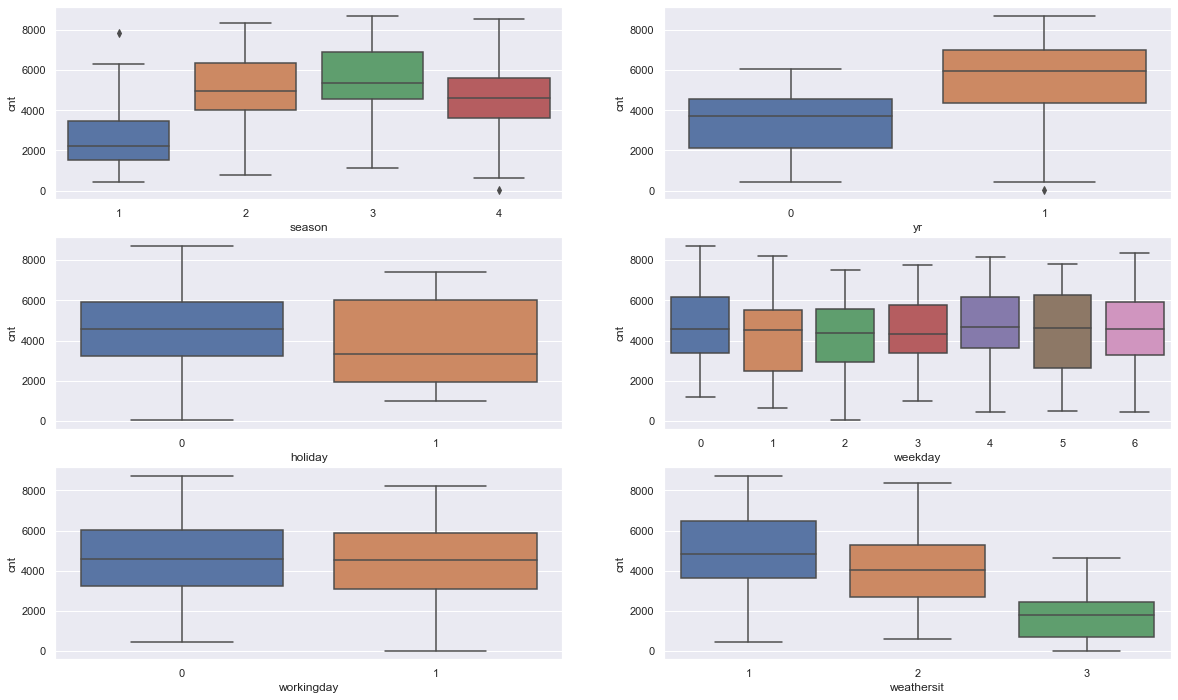

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

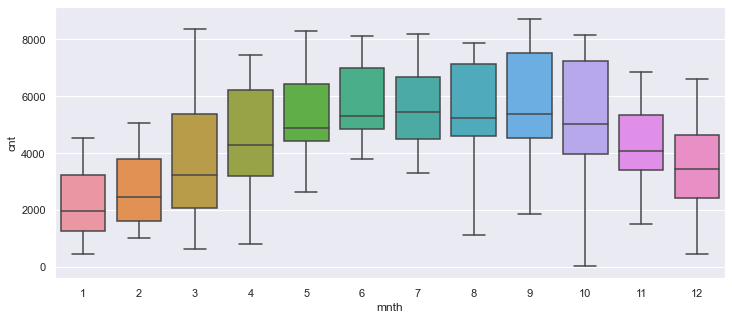

In [39]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

In [40]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.1108,80.5833,10.7499,985
1,02-01-2018,1,0,1,0,2,1,2,14.9026,69.6087,16.6521,801
2,03-01-2018,1,0,1,0,3,1,1,8.0509,43.7273,16.6367,1349
3,04-01-2018,1,0,1,0,4,1,1,8.2000,59.0435,10.7398,1562
4,05-01-2018,1,0,1,0,5,1,1,9.3052,43.6957,12.5223,1600


In [41]:
df.shape

(730, 12)

### Step III : Data Preparation 

In [42]:
def ass_season(x):
    if x == 1:
        return 'spring'
    elif x == 2 :
        return 'summer'
    elif x == 3 :
        return 'fall'
    else:
        return 'winter'
    
df['season'] = df['season'].apply(ass_season)

In [43]:
df.season.value_counts()


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [44]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [45]:
def ass_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

df['mnth']=df[['mnth']].apply(ass_month)

In [46]:
df.mnth.value_counts()

Jul    62
Jan    62
Aug    62
Dec    62
Mar    62
May    62
Oct    62
Apr    60
Nov    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [48]:
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,spring,0,Jan,0,1,1,2,14.1108,80.5833,10.7499,985
1,02-01-2018,spring,0,Jan,0,2,1,2,14.9026,69.6087,16.6521,801
2,03-01-2018,spring,0,Jan,0,3,1,1,8.0509,43.7273,16.6367,1349
3,04-01-2018,spring,0,Jan,0,4,1,1,8.2000,59.0435,10.7398,1562
4,05-01-2018,spring,0,Jan,0,5,1,1,9.3052,43.6957,12.5223,1600


In [49]:
def ass_year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

df['yr'] = df['yr'].apply(ass_year)

In [50]:
df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [51]:
def ass_weather(x):
    return x.map({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})

df['weathersit']= df[['weathersit']].apply(ass_weather)

In [52]:
df.weathersit.value_counts()

Clear          463
Mist_Cloudy    246
Light_Snow      21
Name: weathersit, dtype: int64

In [53]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,spring,2018,Jan,0,1,1,Mist_Cloudy,14.1108,80.5833,10.7499,985
1,02-01-2018,spring,2018,Jan,0,2,1,Mist_Cloudy,14.9026,69.6087,16.6521,801
2,03-01-2018,spring,2018,Jan,0,3,1,Clear,8.0509,43.7273,16.6367,1349
3,04-01-2018,spring,2018,Jan,0,4,1,Clear,8.2000,59.0435,10.7398,1562
4,05-01-2018,spring,2018,Jan,0,5,1,Clear,9.3052,43.6957,12.5223,1600


### Creating Dummy Variables:
   We can create dummy variables on categorical variables season,yr, mnth, weekday, and weathersit.

In [54]:
df=pd.get_dummies(data=df, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)

In [55]:
df.head()

,dteday,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,01-01-2018,0,1,14.1108,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,02-01-2018,0,1,14.9026,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,03-01-2018,0,1,8.0509,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,0,1,8.2000,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,05-01-2018,0,1,9.3052,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
df.shape

(730, 30)

### Step IV: Splitting the Data into Training and Testing Sets

In [57]:
#Split the dataset to Train and Test data :
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [58]:
#checking shape of train and test dataframe
print("Train dataframe : ",df_train.shape)
print("Test dataframe : ",df_test.shape)

Train dataframe :  (510, 30)
Test dataframe :  (219, 30)


### Re-scale the numerical features using Standard Scaler
If you observe windspeed, hum,temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale.

In [59]:
scaler = StandardScaler()

In [60]:
#We can apply scaller to all columns except dummy variables
scale_columns=['cnt','temp','hum','windspeed']
df_train[scale_columns] = scaler.fit_transform(df_train[scale_columns])

In [61]:
df_train.head()

,dteday,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,16-10-2019,0,1,-0.1213,-0.5147,-0.1178,1.5627,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
576,31-07-2019,0,1,1.2317,0.5164,-0.3306,1.3996,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
426,03-03-2019,0,0,-0.4205,-0.0699,-0.3857,-0.2156,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
728,30-12-2019,0,1,-1.2949,-1.0450,2.0181,-1.3795,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
482,28-04-2019,0,0,-0.6276,-1.0008,-0.7799,-0.1366,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [62]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,yr_2019,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.0255,0.7118,-0.0000,-0.0000,-0.0000,-0.0000,0.2431,0.2451,0.2490,0.0961,0.0843,0.0667,0.0882,0.0765,0.0745,0.0980,0.0843,0.0863,0.0863,0.0804,0.5078,0.1549,0.1529,0.1353,0.1431,0.1471,0.1294,0.0294,0.3431
std,0.1578,0.4534,1.0010,1.0010,1.0010,1.0010,0.4294,0.4306,0.4329,0.2950,0.2781,0.2497,0.2839,0.2660,0.2629,0.2977,0.2781,0.2810,0.2810,0.2722,0.5004,0.3622,0.3603,0.3424,0.3506,0.3545,0.3360,0.1691,0.4752
min,0.0000,0.0000,-2.3812,-4.4626,-1.8910,-2.2891,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,-0.8750,-0.7666,-0.7168,-0.7006,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,1.0000,0.0144,0.0229,-0.1415,0.0224,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.0000,0.8774,0.7168,0.5523,0.7625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,2.0509,2.3990,4.0042,2.1677,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


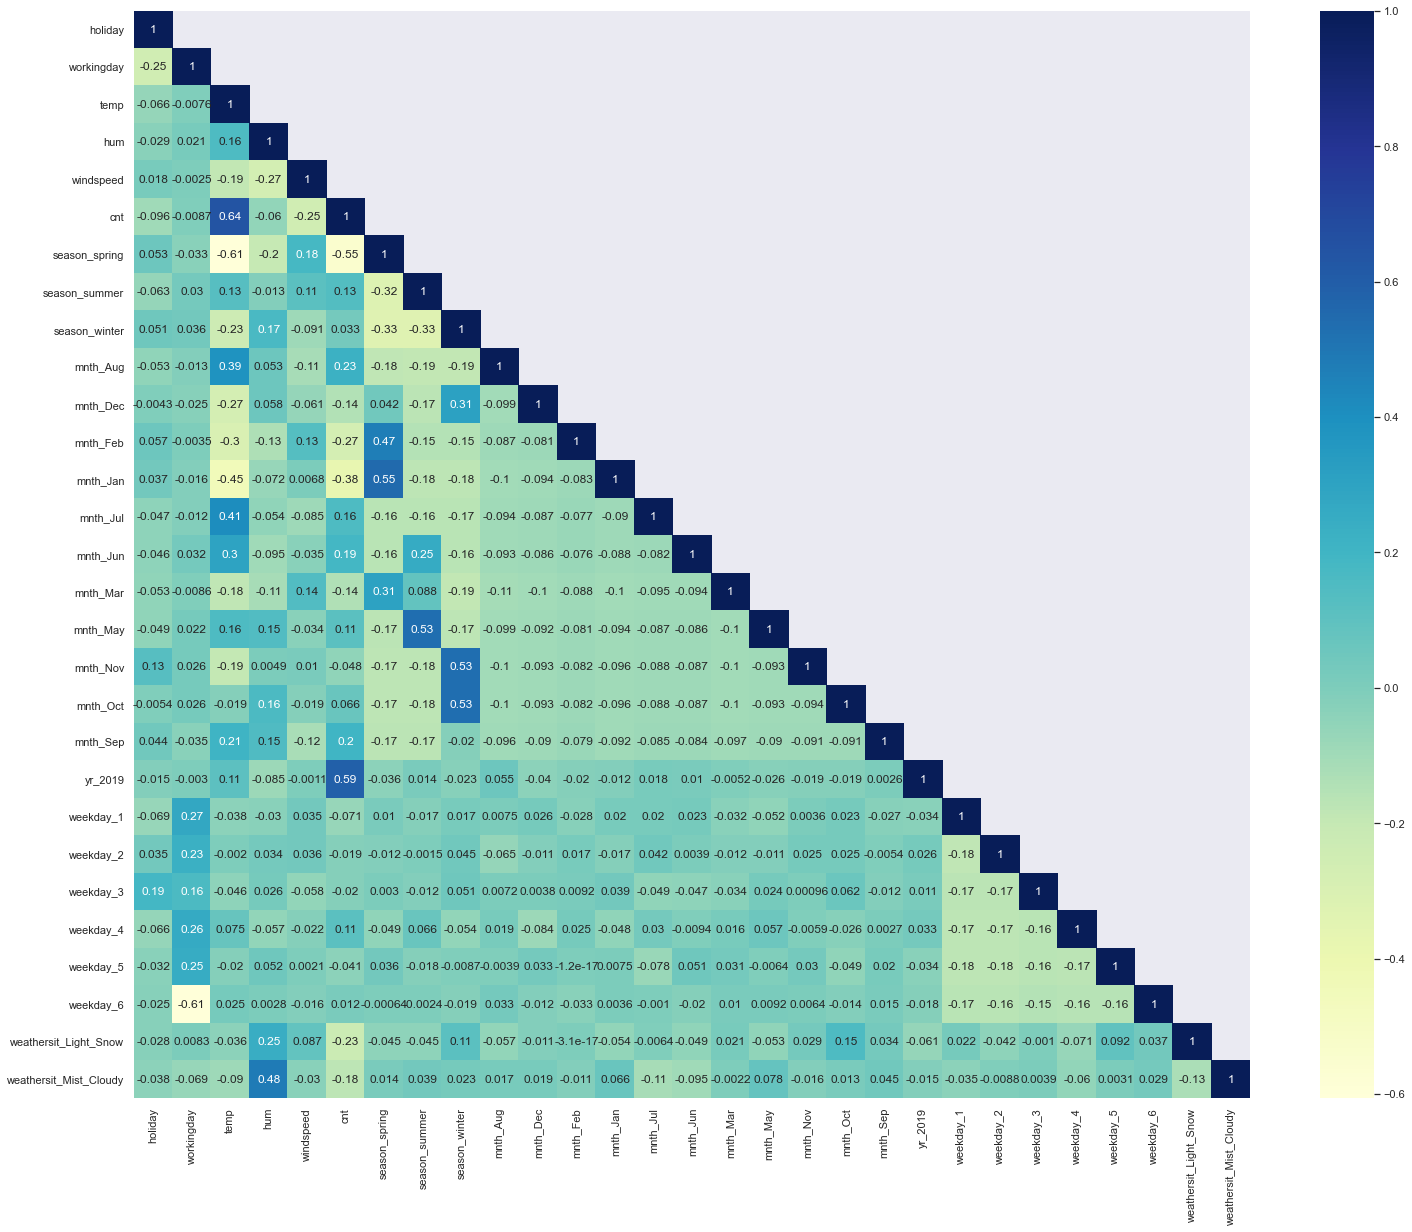

In [63]:
#Now we can plot correlation matrix for bb_train data
mask=np.array(df_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

If we observe temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

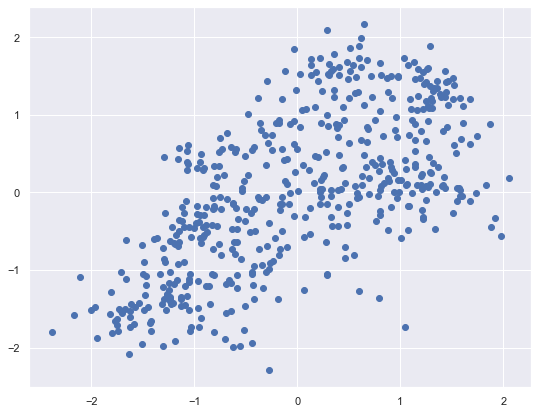

In [65]:
plt.figure(figsize=[9,7])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Inference - So, we pick temp as the first variable and we'll try to fit a regression line to that.

#### Dividing data into X and Y sets for the model building

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

In [67]:
X_train.shape

(510, 29)

In [68]:
y_train.shape

(510,)

### Step V: Building a linear model
Fit a regression line using statsmodels:

In [74]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
est = sm.OLS(y_train.astype(float), X_train_lm(float)).fit()

TypeError: 'DataFrame' object is not callable